## Customer Value Analysis Project
**December 1st, 2018** <br>
**Austin Jarvis** 

In [1]:
from IPython.display import HTML 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### Business Understanding

Customer Lifetime Value (CLV) is a key figure for companies as it provides an importance to each customer. It predicts the net profit attributed to the entire relationship with the customer. Using CLV as the reponse variable it will be analyized to determine which factors play the largest role in valuable customers. 

### Hypothesis


A single predictor variable will be responsible for 60% of the variation, i.e. will have r-squared of > 0.60

### Dataset and Exploration

In [2]:
import warnings
warnings.filterwarnings('ignore') #change to 'default' to reset, 'ignore' to remove futurewarning/deprecated code
import pandas.tseries as tseries #using pandas.tseries instead of datetools
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
import statsmodels.api as sm
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
sns.set_style("darkgrid")
sns.set_context("poster")

rcParams['figure.figsize'] = (12.0, 8.0)

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
print(df.nunique())
print(df.dtypes)

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64
Customer                          object
State                             

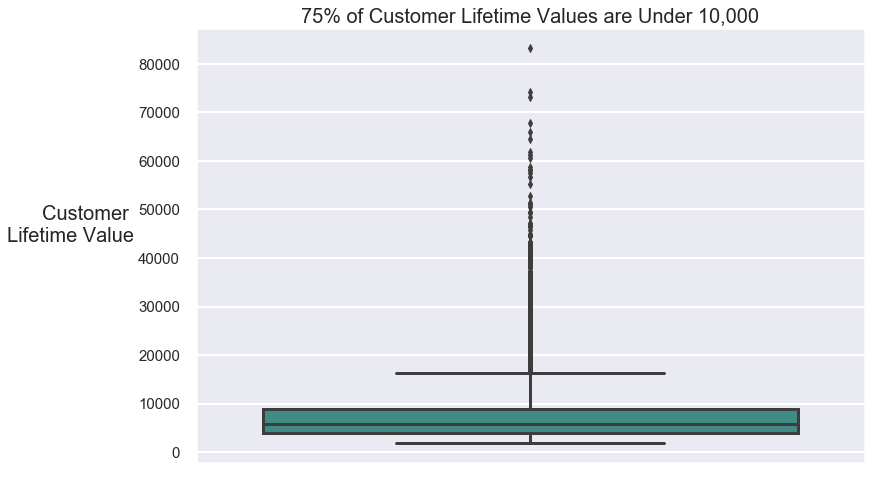

In [6]:
sns.boxplot(y='Customer Lifetime Value',color='#35978f', data=df)
#sns.despine(offset=10, trim=True)
plt.ylabel("Customer \nLifetime Value", rotation = 0,horizontalalignment='right',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(loc='upper right')
plt.title("75% of Customer Lifetime Values are Under 10,000",fontsize=20)

Customer Lifetime Value (CLV) has median around 6,000 but has the potential for greater than 80,000. The majority of CLV lie below 10,000 so the focus could be to obtain as many customers as possible rather than trying to maximize singular customers.

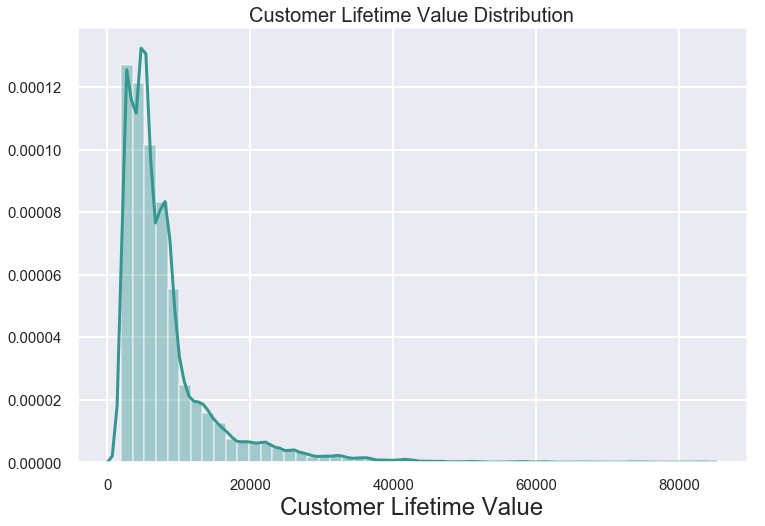

In [7]:
sns.distplot(df['Customer Lifetime Value'],color='#35978f')
#sns.despine(offset=10, trim=True)
#plt.ylabel("Customer \nLifetime Value", rotation = 0,horizontalalignment='right',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(loc='upper right')
plt.title("Customer Lifetime Value Distribution",fontsize=20)

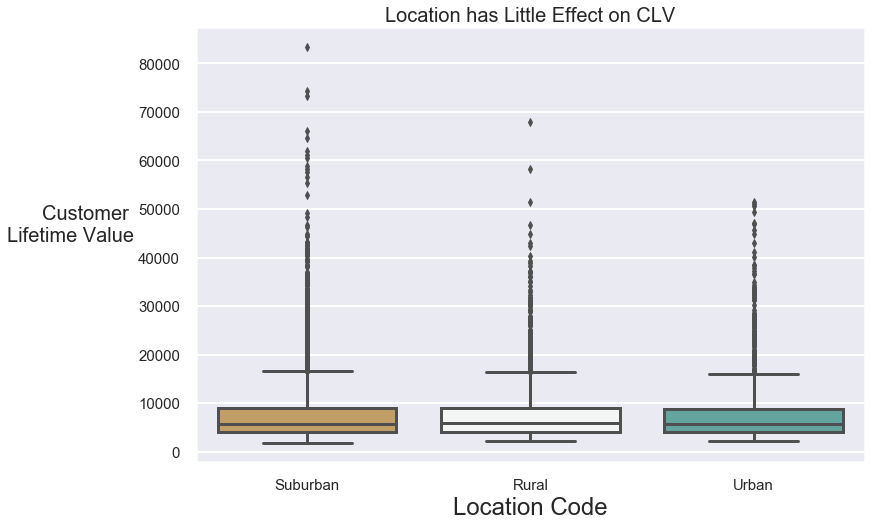

In [8]:
sns.boxplot(x='Location Code',y='Customer Lifetime Value',palette='BrBG', data=df)
#sns.despine(offset=10, trim=True)
plt.ylabel("Customer \nLifetime Value", rotation = 0,horizontalalignment='right',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right')
plt.title("Location has Little Effect on CLV",fontsize=20)

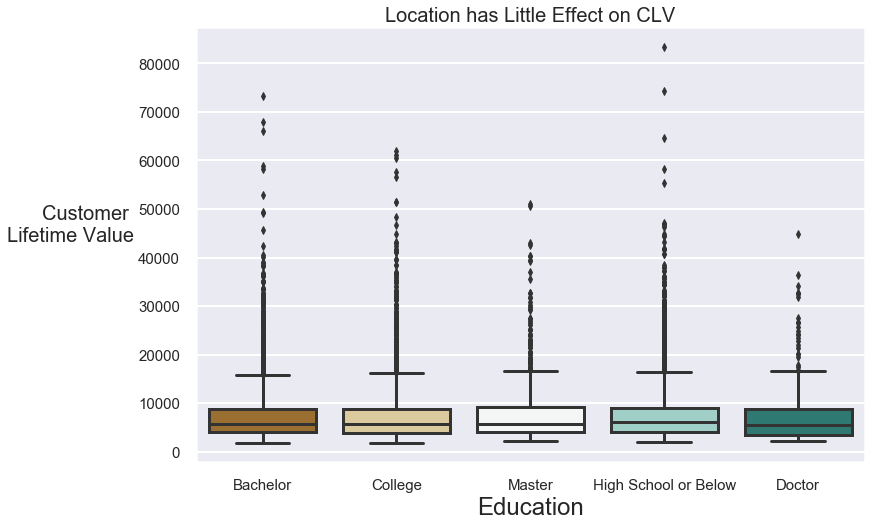

In [9]:
sns.boxplot(x='Education',y='Customer Lifetime Value',palette='BrBG', data=df)
#sns.despine(offset=10, trim=True)
plt.ylabel("Customer \nLifetime Value", rotation = 0,horizontalalignment='right',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right')
plt.title("Location has Little Effect on CLV",fontsize=20)

The location and education variables were visualized to determine if either has a category with significant effect on CLV. The location visualization did not show any trend that customers residing in different locations have a higher CLV. The education plot also showed no signs that education has an effect on CLV.

In [10]:
v_corr = df[["Customer Lifetime Value" , "Income", "Total Claim Amount", "Monthly Premium Auto" ]]
X = v_corr.values
import scipy
from scipy.cluster import hierarchy
#dendro=hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))

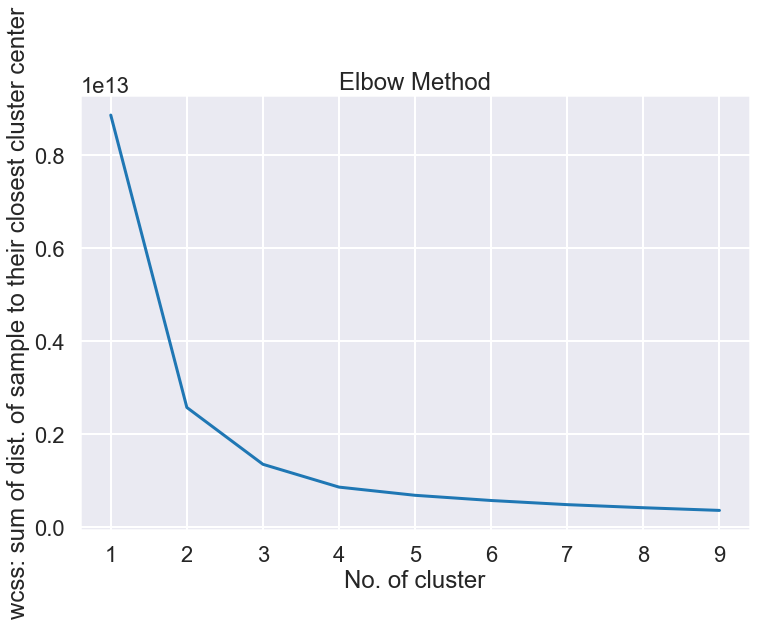

In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )

In [12]:
kmeans_1=KMeans(n_clusters=3)
kmeans_1.fit(X)
cluster_pred=kmeans_1.predict(X)
cluster_pred_2=kmeans_1.labels_
cluster_center=kmeans_1.cluster_centers_

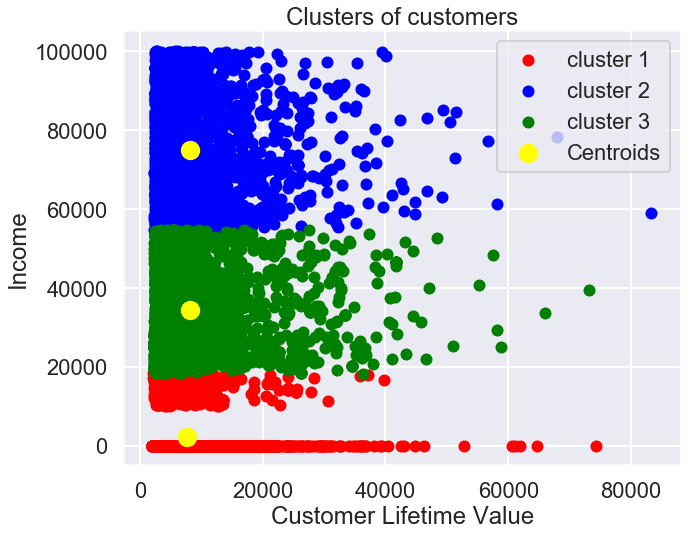

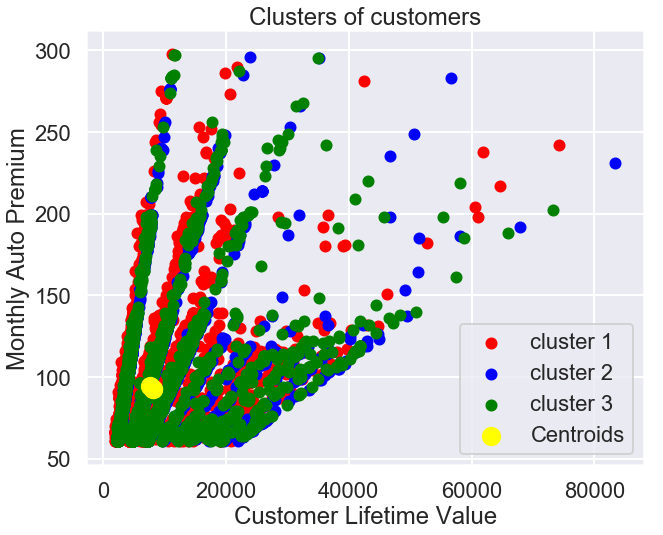

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,1], s = 100, c = 'red', label ='cluster 1' )
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,1], s = 100, c = 'blue', label ='cluster 2' )
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,1], s = 100, c = 'green', label ='cluster 3' )
#plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,1], s = 100, c = 'cyan', label = 'cluster 4')
#plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(cluster_center[:,0],cluster_center[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Income')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,3], s = 100, c = 'red', label ='cluster 1' )
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,3], s = 100, c = 'blue', label ='cluster 2' )
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,3], s = 100, c = 'green', label ='cluster 3' )
#plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,3], s = 100, c = 'cyan', label = 'cluster 4')
#plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,3], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(cluster_center[:,0],cluster_center[:,3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Monthly Auto Premium')
plt.legend()
plt.show()

The previous three plots were used as part of a clustering technique. Three clusters were used which could be helpful in future marketing. For example if a new customer is in the lowest cluster than may not be an ideal candidate to pursue for maximum lifetime value.

### Model and CLV Correlation

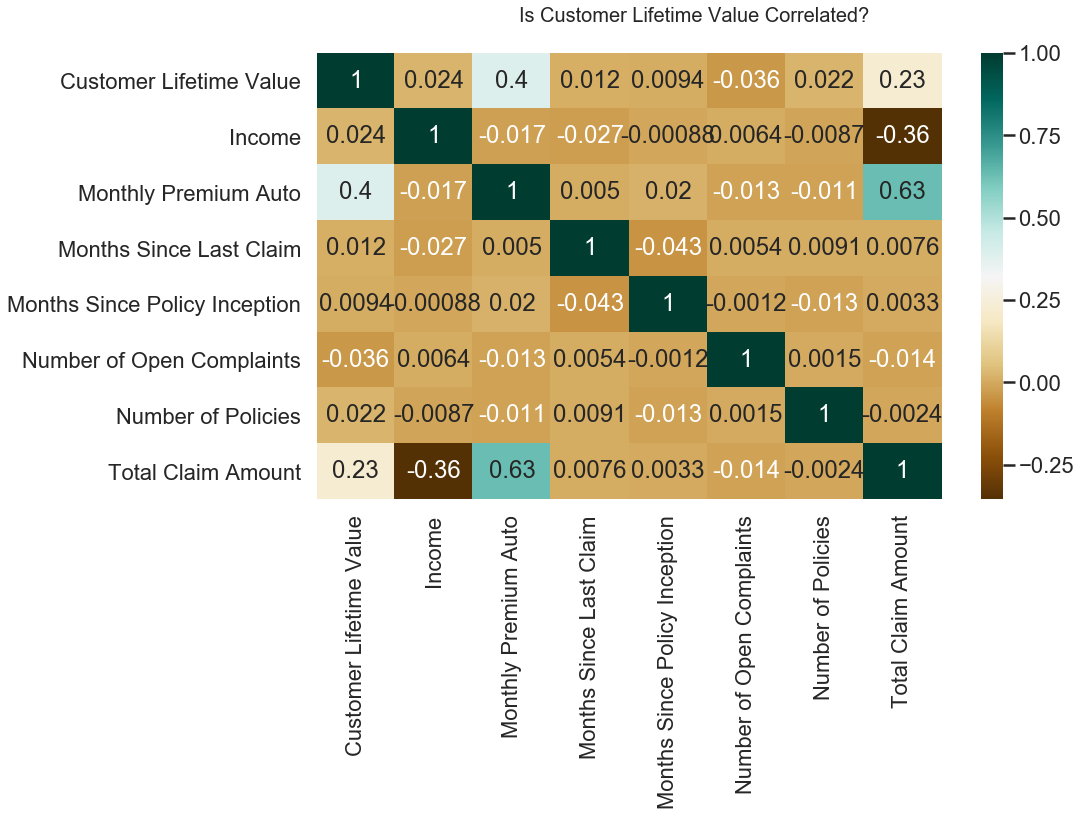

In [14]:

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap='BrBG')
plt.subplots_adjust(top=.9)
plt.suptitle("Is Customer Lifetime Value Correlated?",fontsize=20,verticalalignment='top')
plt.yticks(rotation=0)
plt.show()

The monthly auto premium has the highest correlation with CLV, it will be utilized to build the model.

In [15]:
Id = ['Customer']
target = ["Customer Lifetime Value"]
df=df.drop(['Effective To Date'],1)
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target]
num_cols   = [x for x in df.columns if x not in cat_cols + target + Id]
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
train,test = train_test_split(df,test_size = .25 ,random_state = 111)
cols    = [i for i in df.columns if i not in Id + target]
train_X = train['Monthly Premium Auto']
train_Y = train['Customer Lifetime Value']
test_X  = test['Monthly Premium Auto']
test_Y  = test['Customer Lifetime Value']


The Linear Regression Accuracy is: 0.146


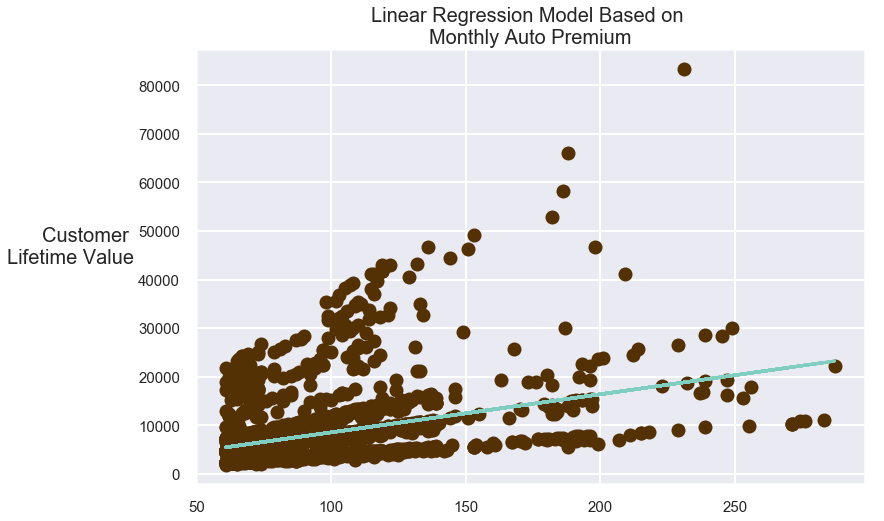

In [17]:
# Linear Regression
regr = LinearRegression()
model=regr.fit(train[['Monthly Premium Auto']], train[['Customer Lifetime Value']])
score=regr.score(test[['Monthly Premium Auto']], test[['Customer Lifetime Value']])
predictions = regr.predict(test[['Monthly Premium Auto']])
print('The Linear Regression Accuracy is:',round(score,3))
plt.scatter(test['Monthly Premium Auto'], test[['Customer Lifetime Value']],  color='#543005')
plt.plot(test['Monthly Premium Auto'], predictions, color='#80cdc1', linewidth=3)
plt.ylabel("Customer \nLifetime Value", rotation = 0,horizontalalignment='right',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right')
plt.title("Linear Regression Model Based on \nMonthly Auto Premium",fontsize=20)
plt.show()

The correlation showed the monthly auto premium to have the largest correlation with Customer Lifetime Value, so it was chosen as the predictor variable. The correlation was not particular high at 0.40 and when attributed to a linear regression model it scores poorly. The monthly auto premium only attributes to 14.6% of the variation in Customer Lifetime Value. 

The hypothesis has been proven incorrect as no single variable attributes to a large percentage of the customer lifetime value variation.